In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from    datetime import datetime
from    datetime import timedelta
import  time

In [ ]:
import psutil
import os, io
import sys
import platform
import sysconfig
import sklearn
import time
from   tabulate import tabulate
from   platform import python_version
import numpy             as np
import pandas            as pd
pd.set_option('display.max_rows', None)

In [ ]:
import matplotlib.pyplot  as plt
import seaborn            as sns
import time

from    sklearn.model_selection                 import KFold
from    sklearn.metrics                         import mean_squared_error, explained_variance_score
from    sklearn.ensemble                        import RandomForestRegressor
from    sklearn.tree                            import DecisionTreeRegressor
from    sklearn.neighbors                       import KNeighborsRegressor
from    sklearn.linear_model                    import TweedieRegressor
from    xgboost                                 import XGBRegressor
from    catboost                                import CatBoostRegressor
from    lightgbm                                import LGBMRegressor
import  statsmodels.api                         as     sm

In [ ]:
def  build_base_model(X, y):
    # Setup
    kf                =   KFold(n_splits = 10, shuffle = True, random_state = 42)
    rmse_scores       =   []
    explained_scores  =   []
    cs_r2_scores      =   []
    itr               =   1
    for train_index, test_index in kf.split(X):
        print("\nFold %d Iteration" %itr)
        itr               +=  1
        X_train, X_test     =  X.iloc[train_index], X.iloc[test_index]
        y_train, y_test     =  y.iloc[train_index], y.iloc[test_index]
        X_train_const       =  sm.add_constant(X_train)
        X_test_const        =  sm.add_constant(X_test)

        model               =  sm.GLM(y_train, X_train_const, family=sm.families.Gaussian())
        results             =  model.fit()
        y_pred              =  results.predict(X_test_const)

        # RMSE & Explained Variance
        rmse                =  np.sqrt(mean_squared_error(y_test, y_pred))
        explained           =  explained_variance_score(y_test, y_pred)
        rmse_scores.append(rmse)
        explained_scores.append(explained)

        # Cox-Snell pseudo R²
        r2_cs               =  round(results.pseudo_rsquared(kind='cs'),4)
        cs_r2_scores.append(r2_cs)
        print(results.summary())
    print(f"Average RMSE: {np.mean(rmse_scores):.3f}")
    print(f"Average Explained Variance: {np.mean(explained_scores):.3f}")
    print(f"Average Cox-Snell Psuedo R²: {np.mean(cs_r2_scores):.4f}")
    print(f"SD RMSE: {np.std(rmse_scores):.3f}")
    print(f"SD Explained Variance: {np.std(explained_scores):.3f}")
    print(f"SD Cox-Snell Psuedo R²: {np.std(cs_r2_scores):.4f}")

    fig, axes               =  plt.subplots(1, 3, figsize=(16, 6))

    axes[0].boxplot(rmse_scores)
    axes[0].set_title("RMSE Across Folds")
    axes[0].set_ylabel("RMSE")

    axes[1].boxplot(explained_scores)
    axes[1].set_title("Explained Variance Across Folds")
    axes[1].set_ylabel("Explained Variance")

    axes[2].boxplot(cs_r2_scores)
    axes[2].set_title("Cox-Snell R² Across Folds")
    axes[2].set_ylabel("R² (Cox-Snell)")

    plt.tight_layout()
    plt.show()


In [ ]:
Models_start_time            =   time.time()

In [ ]:
# Load dataset
Impcols                           =  ['brand_EDA', 'model_EDA', 'model_year_EDA', 'Cylinders','cylinder_layout', 'fuel_type',\
                                      'int_col_EDA', 'color_category','accident', 'milage', 'price']

data                           =  pd.read_csv(r'C:\Users\pvsk1\OneDrive\DSE-Projects\DSE-FT-CH-JAN25-G4\Data\train_dataset_used_for_model_scaled.csv')

print(data.head().T)

X                                 =  data.drop('price',axis=1)
y                                 =  data['price']

print(X.columns)

                         0          1          2          3          4
brand_EDA         8.000000   8.000000   2.000000   8.000000   7.000000
model_EDA        10.000000  10.000000  10.000000  10.000000  10.000000
model_year_EDA   10.000000  10.000000  10.000000   3.000000   7.000000
Cylinders         4.000000   8.000000   8.000000   8.000000   4.000000
cylinder_layout   2.000000   2.000000   2.000000   2.000000   2.000000
fuel_type         3.000000   3.000000   2.000000   3.000000   3.000000
int_col_EDA       6.000000   0.000000   6.000000   1.000000   0.000000
color_category    0.000000   1.000000   2.000000   1.000000   1.000000
accident          1.000000   0.000000   1.000000   1.000000   1.000000
milage            1.000000   0.707866   0.675630   0.095932   0.036039
price             0.190021   0.234625   0.496541   0.797418   0.995444
Index(['brand_EDA', 'model_EDA', 'model_year_EDA', 'Cylinders',
       'cylinder_layout', 'fuel_type', 'int_col_EDA', 'color_category',
       'acci


Fold 1 Iteration
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:               169679
Model:                            GLM   Df Residuals:                   169668
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                        0.017003
Method:                          IRLS   Log-Likelihood:             1.0491e+05
Date:                Mon, 28 Jul 2025   Deviance:                       2884.8
Time:                        13:58:23   Pearson chi2:                 2.88e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7301
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.85

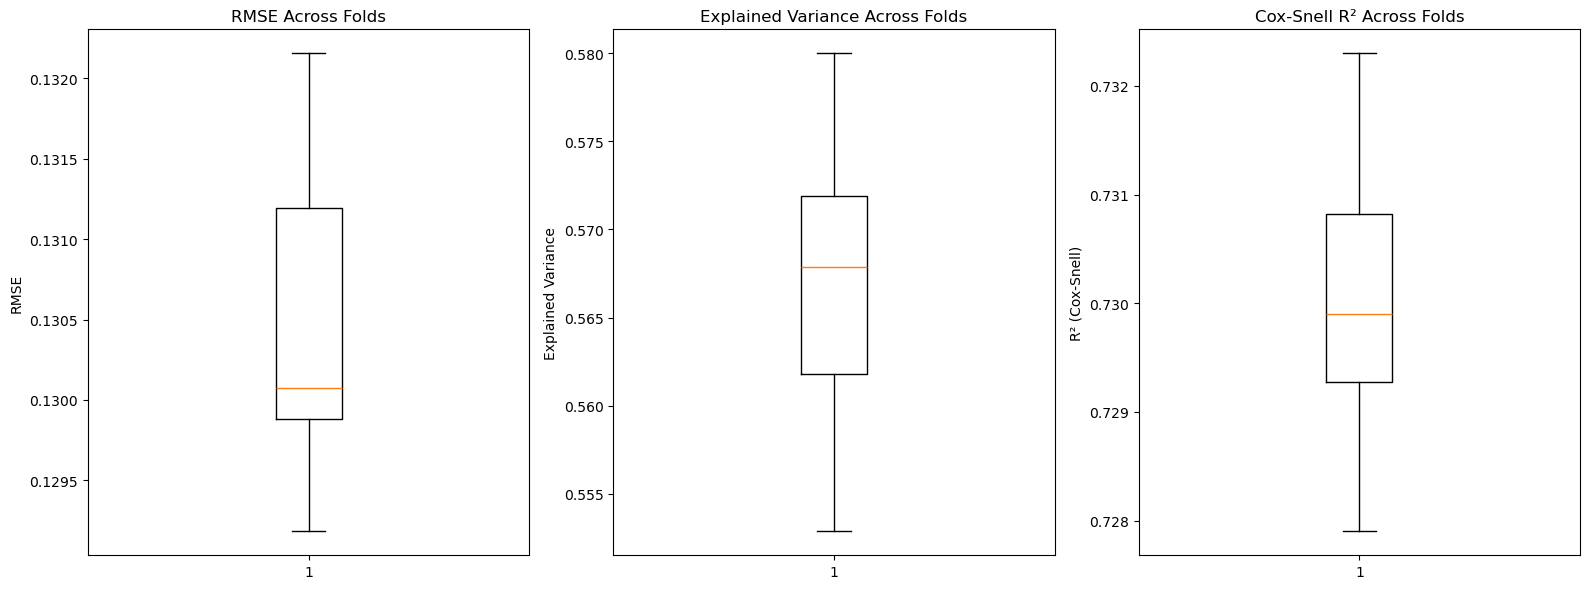

In [ ]:
build_base_model(X, y)

In [ ]:
Models_end_time                            =  time.time()
time_taken                                 =  Models_end_time - Models_start_time # time_taken is in seconds
hours, rest                                =  divmod(time_taken,3600)
minutes, seconds                           =  divmod(rest, 60)

In [ ]:
data = [["This application was processed using the PC with the below configuration", ":"],
        ["sklearn version", sklearn.__version__],
        ["Python version", python_version()],
        ["OS Name", os.name],
        ["System Platform", sys.platform],
        ["OS on which the Python interpreter is currently running", platform.system()],
        ['Platform Architecture',  str(platform.architecture())],
        ["\033[1;31mTotal RAM", str(round(psutil.virtual_memory().total/(1024 ** 3),0)) + ":GB" + "\033[0m\033[0m\033[0m\033[0m"],
        ["\033[1;31mTotal Execution time",  str(hours) + " Min: " + str(minutes) + " Seconds: " + str(round(seconds,6)) + "\033[0m\033[0m\033[0m\033[0m"]
       ]

headers = ["", "Values"]

print(tabulate(data, headers = headers, tablefmt = "grid"))

+--------------------------------------------------------------------------+--------------------------------+
|                                                                          | Values                         |
+==========================================================================+================================+
| This application was processed using the PC with the below configuration | :                              |
+--------------------------------------------------------------------------+--------------------------------+
| sklearn version                                                          | 1.5.1                          |
+--------------------------------------------------------------------------+--------------------------------+
| Python version                                                           | 3.12.7                         |
+--------------------------------------------------------------------------+--------------------------------+
| OS Name 